<a href="https://colab.research.google.com/github/kridtapon/Predictive-Moving-Average-Trend-System/blob/main/Predictive_Moving_Average_Trend_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from sklearn.linear_model import LinearRegression

# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(series, span=200):
    return series.ewm(span=span, adjust=False).mean()

# Function to calculate linear regression trendline projection
def calculate_trendline_projection(df, window=30):
    projected_trendline = np.full(len(df), np.nan)

    for i in range(window, len(df)):
        y = df['Close'][i-window:i].values.reshape(-1, 1)
        x = np.arange(0, window).reshape(-1, 1)

        model = LinearRegression().fit(x, y)
        projected_value = model.predict([[window]])[0][0]  # Predict next step

        projected_trendline[i] = projected_value

    return pd.Series(projected_trendline, index=df.index)

# Define the stock symbol and time period
symbol = 'ANET'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate 200 EMA for trend direction
df['EMA'] = calculate_ema(df['Close'], span=200)

# Calculate projected trendline
df['Projected_Trendline'] = calculate_trendline_projection(df, window=30)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on Trendline Projection
df['Entry'] = (df['Close'] > df['Projected_Trendline']) & (df['Close'] > df['EMA'])
df['Exit'] = (df['Close'] < df['Projected_Trendline']) & (df['Close'] < df['EMA'])

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-3-34faaab0ee28>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Entry'] = (df['Close'] > df['Projected_Trendline']) & (df['Close'] > df['EMA'])
<ipython-input-3-34faaab0ee28>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exit'] = (df['Close'] < df['Projected_Trendline']) & (df['Close'] < df['EMA'])
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sharpe_ratio' 

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           457732.169132
Total Return [%]                       357.732169
Benchmark Return [%]                   763.853053
Max Gross Exposure [%]                      100.0
Total Fees Paid                       3244.295535
Max Drawdown [%]                         34.84308
Max Drawdown Duration                       421.0
Total Trades                                   14
Total Closed Trades                            13
Total Open Trades                               1
Open Trade PnL                      311358.458621
Win Rate [%]                            30.769231
Best Trade [%]                          84.476144
Worst Trade [%]                         -6.372585
Avg Winning Trade [%]                   24.738809
Avg Losing Trade [%]                    -4.010213


[*********************100%***********************]  1 of 1 completed
<ipython-input-4-9f58f153d921>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Entry'] = (df_filter['Close'] > df_filter['Projected_Trendline']) & (df_filter['Close'] > df_filter['EMA'])
<ipython-input-4-9f58f153d921>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Exit'] = (df_filter['Close'] < df_filter['Projected_Trendline']) & (df_filter['Close'] < df_filter['EMA'])
/usr/local/lib/python3.11/dist-packages/vect

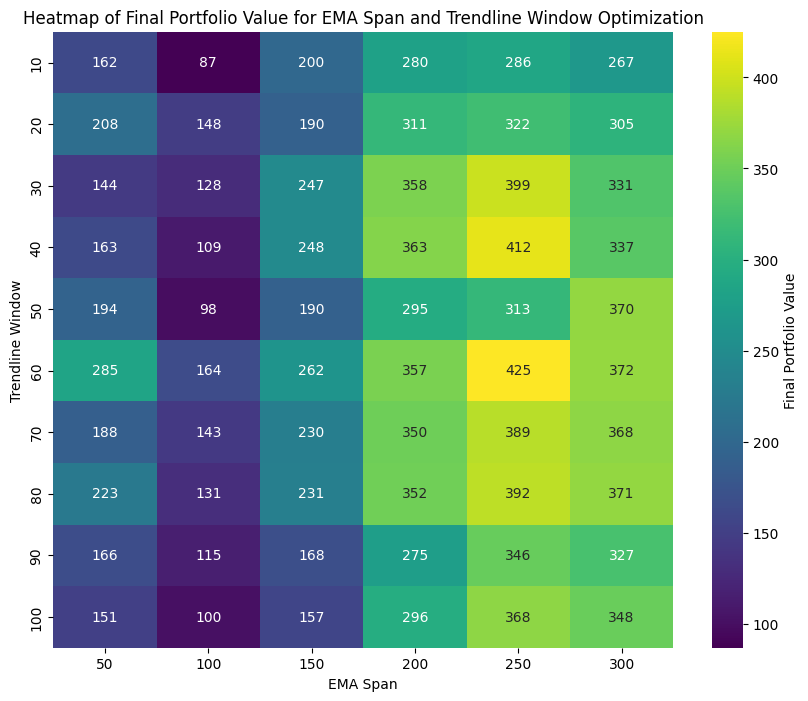

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(series, span=200):
    return series.ewm(span=span, adjust=False).mean()

# Function to calculate linear regression trendline projection
def calculate_trendline_projection(df, window=30):
    projected_trendline = np.full(len(df), np.nan)

    for i in range(window, len(df)):
        y = df['Close'][i-window:i].values.reshape(-1, 1)
        x = np.arange(0, window).reshape(-1, 1)

        model = LinearRegression().fit(x, y)
        projected_value = model.predict([[window]])[0][0]  # Predict next step

        projected_trendline[i] = projected_value

    return pd.Series(projected_trendline, index=df.index)

# Define the stock symbol and time period
symbol = 'ANET'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Parameter grid for optimization
ema_spans = range(50, 301, 50)  # Example range of ema_spans
trendline_windows = range(10, 101, 10)  # Example range of trendline projection windows

# Store results
results = []

# Perform grid search optimization
for ema_span in ema_spans:
    for trendline_window in trendline_windows:
        # Calculate EMA and Projected Trendline
        df['EMA'] = calculate_ema(df['Close'], span=ema_span)
        df['Projected_Trendline'] = calculate_trendline_projection(df, window=trendline_window)

        # Filter data for the test period (2020-2025)
        df_filter = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

        # Define Entry and Exit signals based on Trendline Projection
        df_filter['Entry'] = (df_filter['Close'] > df_filter['Projected_Trendline']) & (df_filter['Close'] > df_filter['EMA'])
        df_filter['Exit'] = (df_filter['Close'] < df_filter['Projected_Trendline']) & (df_filter['Close'] < df_filter['EMA'])

        # Backtest using vectorbt
        portfolio = vbt.Portfolio.from_signals(
            close=df_filter['Close'],
            entries=df_filter['Entry'],
            exits=df_filter['Exit'],
            init_cash=100_000,
            fees=0.001
        )

        # Record the Total Return (or other performance metrics)
        total_return = portfolio.stats()['Total Return [%]']
        results.append((ema_span, trendline_window, total_return))

# Convert results into a DataFrame for easy plotting
results_df = pd.DataFrame(results, columns=['EMA_Span', 'Trendline_Window', 'Total_Return'])

# Pivot the results for heatmap
heatmap_data = results_df.pivot(index='Trendline_Window', columns='EMA_Span', values='Total_Return')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".0f", cbar_kws={'label': 'Final Portfolio Value'})
plt.title('Heatmap of Final Portfolio Value for EMA Span and Trendline Window Optimization')
plt.xlabel('EMA Span')
plt.ylabel('Trendline Window')
plt.show()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

<ipython-input-11-450c2567aa51>:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-450c2567aa51>:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/lo

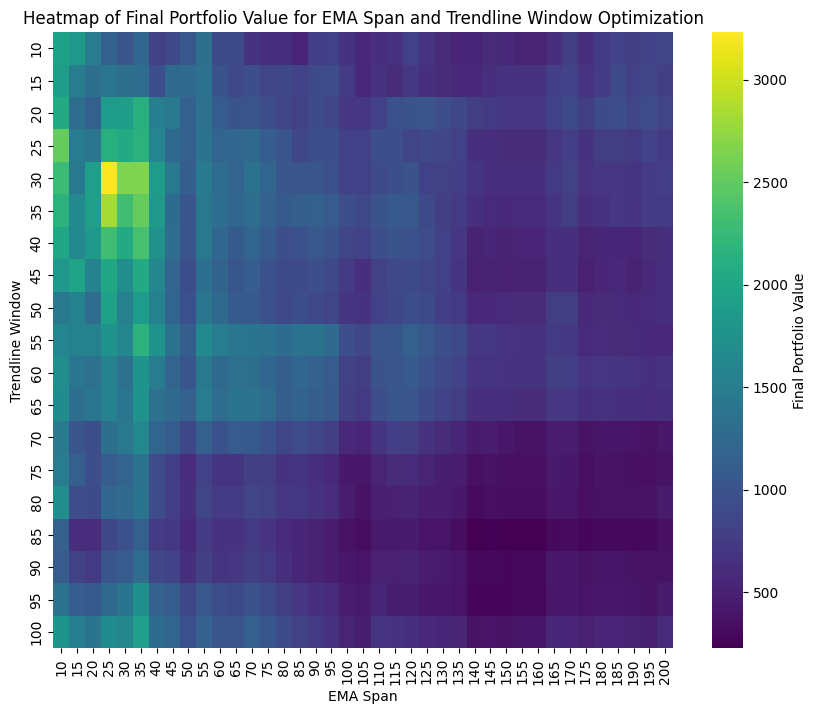

Best EMA Span: 25.0
Best Trendline Window: 30.0
Best Total Return: 3232.2998896609397


<ipython-input-11-450c2567aa51>:104: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-450c2567aa51>:105: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                          3332299.889661
Total Return [%]                       3232.29989
Benchmark Return [%]                  1307.892888
Max Gross Exposure [%]                      100.0
Total Fees Paid                      75023.571656
Max Drawdown [%]                        47.069445
Max Drawdown Duration                       244.0
Total Trades                                   33
Total Closed Trades                            32
Total Open Trades                               1
Open Trade PnL                     1180790.585829
Win Rate [%]                               53.125
Best Trade [%]                         159.713255
Worst Trade [%]                         -15.61502
Avg Winning Trade [%]                   29.738421
Avg Losing Trade [%]                    -4.634367


In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(series, span=200):
    return series.ewm(span=span, adjust=False).mean()

def calculate_trendline_projection(df, window=30):
    projected_trendline = np.full(len(df), np.nan)

    window = int(window)  # Ensure window is an integer

    for i in range(window, len(df)):
        y = df['Close'][i-window:i].values.reshape(-1, 1)
        x = np.arange(0, window).reshape(-1, 1)

        model = LinearRegression().fit(x, y)
        projected_value = model.predict([[window]])[0][0]  # Predict next step

        projected_trendline[i] = projected_value

    return pd.Series(projected_trendline, index=df.index)

# Define the stock symbol and time period
symbol = 'TSLA'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Parameter grid for optimization
ema_spans = range(10, 201, 5)  # Example range of ema_spans
trendline_windows = range(10, 101, 5)  # Example range of trendline projection windows

# Store results
results = []

# Perform grid search optimization
for ema_span in ema_spans:
    for trendline_window in trendline_windows:
        # Calculate EMA and Projected Trendline
        df['EMA'] = calculate_ema(df['Close'], span=ema_span)
        df['Projected_Trendline'] = calculate_trendline_projection(df, window=trendline_window)

        # Filter data for the test period (2020-2025)
        df_filter = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

        # Define Entry and Exit signals based on Trendline Projection
        df_filter['Entry'] = (df_filter['Close'] > df_filter['Projected_Trendline']) & (df_filter['Close'] > df_filter['EMA'])
        df_filter['Exit'] = (df_filter['Close'] < df_filter['Projected_Trendline']) & (df_filter['Close'] < df_filter['EMA'])

        # Backtest using vectorbt
        portfolio = vbt.Portfolio.from_signals(
            close=df_filter['Close'],
            entries=df_filter['Entry'],
            exits=df_filter['Exit'],
            init_cash=100_000,
            fees=0.001
        )

        # Record the Total Return (or other performance metrics)
        total_return = portfolio.stats()['Total Return [%]']
        results.append((ema_span, trendline_window, total_return))

# Convert results into a DataFrame for easy plotting
results_df = pd.DataFrame(results, columns=['EMA_Span', 'Trendline_Window', 'Total_Return'])

# Find the best parameters
best_result = results_df.loc[results_df['Total_Return'].idxmax()]
best_ema_span = best_result['EMA_Span']
best_trendline_window = best_result['Trendline_Window']

# Pivot the results for heatmap
heatmap_data = results_df.pivot(index='Trendline_Window', columns='EMA_Span', values='Total_Return')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=False, cmap='viridis', fmt=".0f", cbar_kws={'label': 'Final Portfolio Value'})
plt.title('Heatmap of Final Portfolio Value for EMA Span and Trendline Window Optimization')
plt.xlabel('EMA Span')
plt.ylabel('Trendline Window')
plt.show()

# Print the best parameters
print(f"Best EMA Span: {best_ema_span}")
print(f"Best Trendline Window: {best_trendline_window}")
print(f"Best Total Return: {best_result['Total_Return']}")

# Backtest using the best parameters
df['EMA'] = calculate_ema(df['Close'], span=best_ema_span)
df['Projected_Trendline'] = calculate_trendline_projection(df, window=best_trendline_window)

# Filter data for the test period (2020-2025)
df_filter = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on Trendline Projection
df_filter['Entry'] = (df_filter['Close'] > df_filter['Projected_Trendline']) & (df_filter['Close'] > df_filter['EMA'])
df_filter['Exit'] = (df_filter['Close'] < df_filter['Projected_Trendline']) & (df_filter['Close'] < df_filter['EMA'])

# Backtest using vectorbt with the best parameters
portfolio = vbt.Portfolio.from_signals(
    close=df_filter['Close'],
    entries=df_filter['Entry'],
    exits=df_filter['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display the portfolio stats with the best parameters
print(portfolio.stats())

portfolio.plot().show()
